In [5]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [6]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

In [7]:
# 차트의 한글 깨짐 방지를 위한 코드 추가

from matplotlib import font_manager, rc
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

%matplotlib inline

- 교차검증
- score 메서드가 제공하는 정확도와 $R^2$ 값 이외에 분류와 회귀 성능을 측정하는 다른 방법
- 가장 좋은 일반화 성능을 얻기 위해 지도 학습 모델의 매개변수를 조정하는데 유용한 그리드 서치 

# 교차 검증
데이터를 여러 번 반복해서 나누고 여러 모델을 학습<br>
가장 널리 사용되는 방법은 'k-겹 교차 검증(k-fold cross-validation)'으로서 k는 보통 5 혹은 10을 이용

5-겹 교차 검증을 하기 위해서 데이터를 먼저 폴드(fold)라고 하는 거의 비슷한 크기의 '부분 집합' 다섯 개로 나눈다.<br>
그다음 일련의 모델들을 만들어 각각을 테스트셋, 나머지 폴드를 훈련셋으로 사용하여 학습하는 과정을 5번 반복한다.

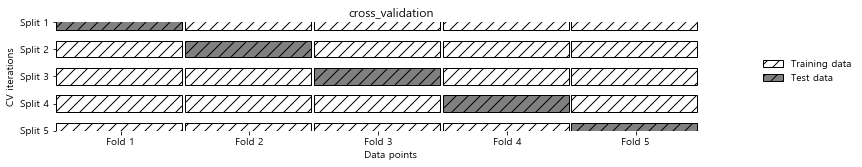

In [8]:
mglearn.plots.plot_cross_validation()

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg,iris.data,iris.target,cv=3)
print("교차 검증 점수: ",scores)

교차 검증 점수:  [0.98 0.96 0.98]


In [10]:
scores = cross_val_score(logreg,iris.data,iris.target,cv=5)
print("교차 검증 점수: ",scores)

교차 검증 점수:  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [11]:
# 교차검증의 정확도를 간단하게 나타내려면 평균을 사용한다.

scores.mean()

0.9733333333333334

5-겹 교차 검증이 만들어낸 5개의 값을 보면 90%~100%로 차이가 크다. 이것은 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문일 수 있다.

교차 검증에는 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환하는 cross_validate 함수를 사용할 수도 있다.

In [12]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg,iris.data,iris.target,return_train_score = True)
res

{'fit_time': array([0.01951861, 0.01999474, 0.01607561, 0.01494098, 0.0120151 ]),
 'score_time': array([0.        , 0.0010004 , 0.00103378, 0.00102234, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [13]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n",res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.019519,0.000000,0.966667,0.966667
1,0.019995,0.001000,1.000000,0.966667
2,0.016076,0.001034,0.933333,0.983333
3,0.014941,0.001022,0.966667,0.983333
4,0.012015,0.000000,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.016509
score_time     0.000611
test_score     0.973333
train_score    0.975000
dtype: float64


교차 검증 점수는 우연성을 배제한다. 점수를 높이기 위해서는 일반화가 잘 되어야한다.<br>
또 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수 있다. 90~100%라는 iris 데이터의 결과는 최악의 결과와 최선의 경우를 짐작할 수 있게한다.

또 75%로 훈련하는 train_test_split에 비해 5-겹 교차 검증은 80%, 10-겹 교차 검증은 90%를 모델 학습에 사용하므로 더 정확한 모델을 만들 수 있다.

단점으로는 연산 비용이 늘어난다는 것이다.

#### 교차 검증은 모델을 반환하지 않는다.  내부적으로야 여러 모델이 만들어지지만 교차 검증의 목적은 단지 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것이다.

## 계층별 k-겹 교차 검증과 그 외 전략들

In [14]:
# 아래에서와 같이 나열 순서로 데이터를 나누면 제대로 학습 시킬 수 없다.
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 단순한 k-겹 교차 검증은 문제가 있으니, sklearn은 분류일 경우 '계층별 k-겹 교차 검증(stratified k-fold cross-validation)'을 사용

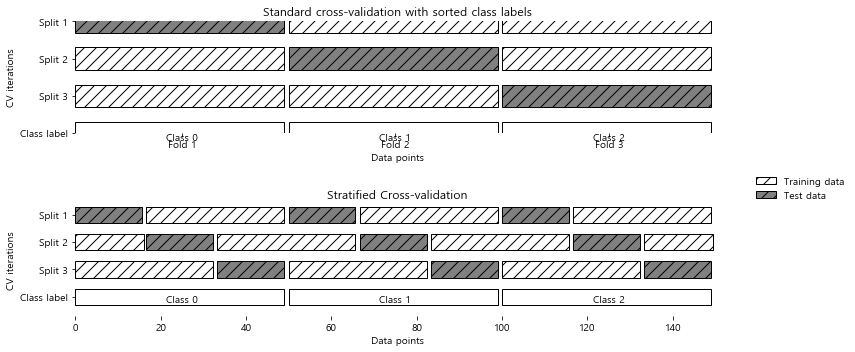

In [15]:
mglearn.plots.plot_stratified_cross_validation()

각 폴드 내의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눈다.

sklearn은 회귀에서 기본 k-겹 교차 검증을 사용한다.

### 교차 검증 상세 옵션
cv매개변수에 '교차 검증 분할기(cross-validation splitter)'을 전달함으로써 데이터 분할을 더 세밀히 제어할 수 있다.

보통 회귀에서는 k-겹 교차 검증, 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동한다. 하지만 다른 전략이 필요할 때가 있는데<br>가령 다른 사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용할 때 등 이다.

In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [17]:
# 위에서 봤다시피 iris데이터의 target이 순서대로 되어있기 때문에
kfold = KFold(n_splits=3)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0., 0., 0.])

In [18]:
# 계층별 폴드를 만드는 대신 뒤죽박죽으로 데이터를 섞어 샘플의 순서를 조정하는 방법도 있다.

kfold = KFold(n_splits=3,shuffle=True,random_state=0)
cross_val_score(logreg, iris.data,iris.target,cv=kfold)

array([0.98, 0.96, 0.96])

### LOOCV : leave-one-out cross-validation
폴드 하나에 샘플 하나만 들어있는 k-겹 교차 검증 방법이다. 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용한다.
<br> 큰 데이터셋은 시간이 더 걸릴 수 있으나, 작은 데이터셋에서는 이따금 더 좋은 결과를 만들어낸다.

In [19]:
from sklearn.model_selection import LeaveOneOut
loo  = LeaveOneOut()
scores = cross_val_score(logreg,iris.data, iris.target,cv=loo)

In [20]:
print(len(scores))
print(scores.mean())

150
0.9666666666666667


### 임의 분할 교차 검증
train_size만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 포인트로 테스트 세트를 만들도록 분할, n_splits 횟수만큼 반복

훈련 세트와 테스트 세트의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용할 수 있는데 대규모 데이터셋으로 작업할 때 도움이 된다.<br>(subsampling)

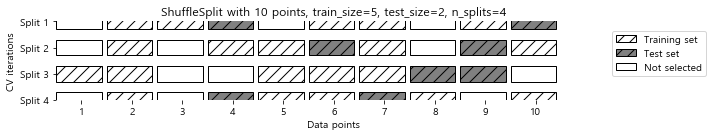

In [21]:
# 샘플이 10개인 데이터셋을 5개 포인트의 훈련 세트, 2개 포인트의 테스트 세트로 4번 반복하여 나눈 것을 보여준다.

mglearn.plots.plot_shuffle_split()

In [22]:
# 데이터셋의 50%을 훈련 세트로, 50%를 테스트 세트로 10번 반복 분할한다.
# (KFold와는 다르게, 하나의 포인트가 여러 테스트셋에 포함될 수 있음)

from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores = cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
print("교차 검증 점수:\n",scores)

교차 검증 점수:
 [0.94666667 0.94666667 0.96       0.94666667 0.97333333 0.97333333
 0.94666667 0.97333333 0.98666667 0.93333333]


### 그룹별 교차 검증
데이터 안에 매우 연관된 그룹이 있을 때 같은 그룹의 요소가 훈련 세트와 테스트 세트에 모두 나타난다면 정확한 성능을 평가할 수 없다.<br>이를 위해 그룹을 기록한 배열을 groups 매개변수로 전달받을 수 있는 GroupKFold를 사용할 수 있다.<br>
groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것이며 클래스 레이블과 혼동해서는 안 된다.

대표적인 예로는 의료 애플리케이션이 일반적. 같은 환자로부터 얻은 여러 샘플을 가지고 새 환자에게 일반화하는 것이 목적.<br>
음성 인식에서도 데이터셋에 같은 사람의 목소리가 여러 개 녹음되어 있을 수 있는데, 주 관심은 새 사람의 대화를 인식하는 것이다.

In [23]:
# 데이터셋은 12개의 포인트로 이뤄져있고 groups는 각 데이터 포인트에 대해 각 포인트가 어떤 그룹에 속하는지를 나타낸다.
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=12,random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg,X,y,groups,cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n",scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


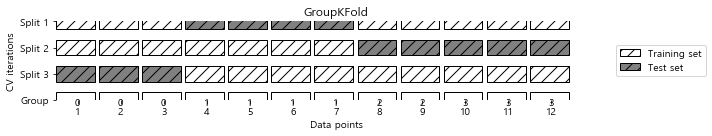

In [24]:
mglearn.plots.plot_group_kfold()

## 반복 교차 검증
RepeatedKFold(회귀)와 RepeatedStratifiedKFold(분류) 분할기
각각 KFold와 StratifiedKFold 클래스를 사용

In [25]:
# 전체 검증 점수는 n_splits * n_repeats 개수만큼 만들어짐
# 기본값을 사용할 경우 5*10 = 50 개의 모델을 훈련

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg,iris.data,iris.target,cv=rskfold)


In [26]:
print(scores)
print(scores.mean())

[1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
0.9646666666666667
